In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [11]:
# For static images:
IMAGE_FILES = ['img_data/source.png']

0
face_landmarks: landmark {
  x: 0.43680211901664734
  y: 0.5968692898750305
  z: -0.06231820955872536
}
landmark {
  x: 0.41823235154151917
  y: 0.5416107177734375
  z: -0.1420116126537323
}
landmark {
  x: 0.42130300402641296
  y: 0.5552940368652344
  z: -0.0745411068201065
}
landmark {
  x: 0.3932149112224579
  y: 0.4804500341415405
  z: -0.11215424537658691
}
landmark {
  x: 0.41633424162864685
  y: 0.5226908326148987
  z: -0.15180827677249908
}
landmark {
  x: 0.41448161005973816
  y: 0.4977599084377289
  z: -0.14345954358577728
}
landmark {
  x: 0.4111047387123108
  y: 0.43807253241539
  z: -0.08059035241603851
}
landmark {
  x: 0.2429063767194748
  y: 0.4332946538925171
  z: 0.02321879006922245
}
landmark {
  x: 0.40823471546173096
  y: 0.39813748002052307
  z: -0.06587804853916168
}
landmark {
  x: 0.40657830238342285
  y: 0.3746957778930664
  z: -0.07253922522068024
}
landmark {
  x: 0.4012550115585327
  y: 0.2769097089767456
  z: -0.054068658500909805
}
landmark {
  x: 0.437

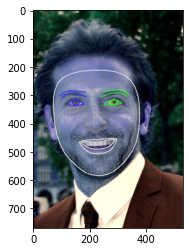

In [12]:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    print(idx)
    image = cv2.imread(file)
    image = image[:,:,]
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    plt.imshow(annotated_image)
#     cv2.imwrite('./result/annotated_image' + str(idx) + '.png', annotated_image)